# 1.2 Watts–Strogatz Small-World Network (WS Model)

In this notebook, Im gonna explore the Watts–Strogatz (WS) small-world model.

Goals:

1. Understand what WS small-world networks are.
2. Learn how to generate WS graphs using NetworkX.
3. Compare properties with ER random graphs.
4. Examine clustering and path length — key features of small-world structure.
5. Build intuition for how real networks (including Ethereum) differ from WS.

## 1. import libraries

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True


import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True


## 2. What is a Watts–Strogatz (WS) small-world network?

WS small-world networks were introduced in 1998 to explain why many real-world networks exhibit both:

### 1. **Short average path lengths**  
(similar to random graphs)

### 2. **High clustering**  
(similar to regular lattices / social networks)

The WS model is built in three steps:

1. Start with a **regular ring lattice**:  
   each node connects to its `k` nearest neighbors.

2. With probability `p`, **rewire** each edge to a new random node.

3. This creates:
   - High clustering (from the lattice),
   - Short paths (from random shortcuts).

---

### Key parameters:

- `n`: number of nodes  
- `k`: each node connects to `k` nearest neighbors  
- `p`: rewiring probability  

---

### Important regimes:

| Rewiring p | Behavior |
|-----------|----------|
| p = 0 | Perfect lattice, very high clustering, long paths |
| p → small | **Small-world** region: high clustering + short paths |
| p = 1 | Random graph (like ER) |

This produces realistic social network patterns:
- triangle formation  
- local communities  
- but still with short paths between distant nodes  
("six degrees of separation")


## 3. Choose parameters

In [2]:
n = 5000
k = 6      # each node links to 6 neighbors in the initial ring
p = 0.05   # rewiring probability

print(f"WS model parameters: n={n}, k={k}, p={p}")


WS model parameters: n=5000, k=6, p=0.05


## 4. Generate the WS graph

In [3]:
G_ws = nx.watts_strogatz_graph(n, k, p, seed=42)

print("=== WS Graph Generated ===")
print("Nodes:", G_ws.number_of_nodes())
print("Edges:", G_ws.number_of_edges())


=== WS Graph Generated ===
Nodes: 5000
Edges: 15000


## 5. Basic structural stats

In [ ]:
num_nodes = G_ws.number_of_nodes()
num_edges = G_ws.number_of_edges()
avg_degree = 2 * num_edges / num_nodes

components = list(nx.connected_components(G_ws))

print("=== Basic WS Graph Statistics ===")
print("Nodes:", num_nodes)
print("Edges:", num_edges)
print("Average degree:", avg_degree)
print("Connected components:", len(components))
print("Largest CC size:", len(components[0]))

=== Basic WS Graph Statistics ===
Nodes: 5000
Edges: 15000
Average degree: 6.0
Connected components: 1
Largest CC size: 5000


In WS models with low p, the graph is almost always fully connected.


## 6. Clustering coefficient & path length

In [5]:
# Clustering coefficient
clustering_ws = nx.average_clustering(G_ws)

# Shortest path length (only LCC)
largest_cc_nodes = max(nx.connected_components(G_ws), key=len)
G_lcc_ws = G_ws.subgraph(largest_cc_nodes).copy()
avg_path_ws = nx.average_shortest_path_length(G_lcc_ws)

print("=== WS Model Structural Properties ===")
print("Average clustering coefficient:", clustering_ws)
print("Average shortest path length (LCC):", avg_path_ws)


=== WS Model Structural Properties ===
Average clustering coefficient: 0.5201934920634701
Average shortest path length (LCC): 10.194557631526305


### Interpretation

- WS graphs typically have **high clustering** (much higher than ER).
- Despite high clustering, they still keep **short average path length** thanks to a small amount of rewiring.

This is the defining property of "small-world networks".


## 7. Degree Distribution

In [6]:
degrees = np.array([deg for _, deg in G_ws.degree()])

print("Min degree:", degrees.min())
print("Max degree:", degrees.max())


Min degree: 4
Max degree: 9


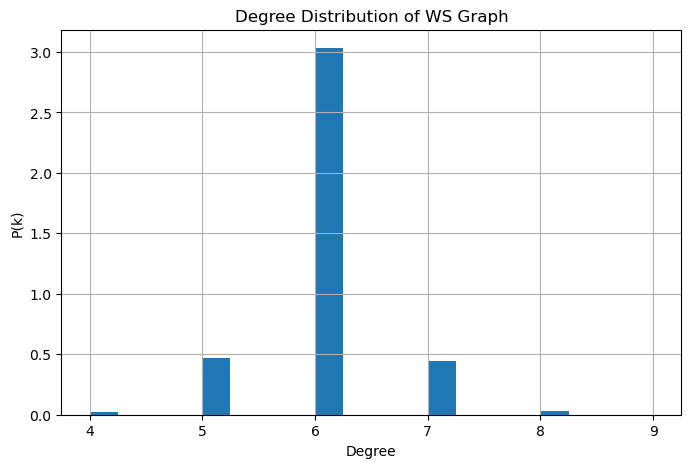

In [7]:
plt.hist(degrees, bins=20, density=True)
plt.title("Degree Distribution of WS Graph")
plt.xlabel("Degree")
plt.ylabel("P(k)")
plt.show()


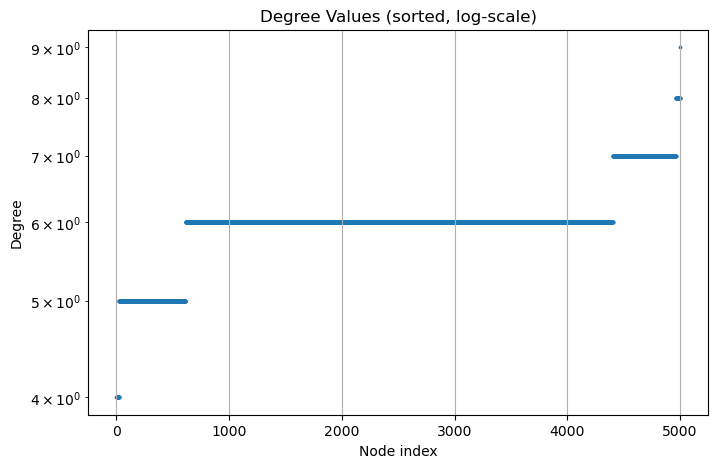

In [8]:
plt.scatter(range(len(degrees)), np.sort(degrees), s=3)
plt.yscale("log")
plt.title("Degree Values (sorted, log-scale)")
plt.xlabel("Node index")
plt.ylabel("Degree")
plt.show()


WS degree distributions are usually **narrow**, because the graph starts as a regular lattice.

Even after rewiring, the degree variation is small.

This is very different from BA scale-free networks, and even more different from Ethereum.


# 8. Comparing WS vs ER graphs

| Property | ER Random Graph | WS Small-World Graph |
|----------|------------------|-----------------------|
| Degree distribution | Poisson-like, narrow | Narrow but slightly shifted by rewiring |
| Clustering coefficient | Very low | **High** |
| Path length | Short | **Short** |
| Local structure | Almost none | Strong local neighborhoods |
| Global shortcuts | Some | Yes |
| Motivation | Mathematical simplicity | Social network realism |

---

### Intuition

- ER ≈ random noise  
- WS ≈ "friends of friends" + random shortcuts  


# 9. Recap: WS small-world model

In this notebook, we covered:

1. The construction of a WS small-world network.
2. Typical WS properties:
   - **High clustering**
   - **Short average path length**
3. Degree distribution is narrow (not scale-free).
4. WS networks resemble:
   - social networks,
   - biological networks,
   - neural networks,
   rather than blockchain / economic networks.

In the next notebook, we will study the **Barabási–Albert (BA)** scale-free model — the most important model for understanding **Ethereum's real transaction graph**.
